<a href="https://colab.research.google.com/github/maryamfatehifar/FIVES/blob/main/fundus_fives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
# Set up Git
#!git config --global user.name "maryamfatehifar"
#!git config --global user.email "maryam.fatehifar@manchester.ac.uk"


In [99]:
pip install pvbm --upgrade

In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
from PIL import Image,ImageFilter #Import Pillow library to load the images
import numpy as np #Import numpy
import matplotlib.pyplot as plt #Import matplotlib library for visualization
from skimage.morphology import skeletonize,square,dilation #Import functions to compute morphological operations
import os

In [158]:
!git clone https://github.com/maryamfatehifar/FIVES.git

Cloning into 'FIVES'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 624.87 KiB | 9.06 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [136]:
image="2.png"

In [166]:
#url = 'https://github.com/maryamfatehifar/FIVES/blob/main/'+image
#os.system(f'wget -P images {url} > /dev/null 2>&1')
#print("Images downloaded successfully")

In [167]:
!pwd
!ls -l

/content
total 8
drwxr-xr-x 3 root root 4096 Jul  1 14:34 FIVES
drwxr-xr-x 1 root root 4096 Jun 27 13:26 sample_data


In [159]:
directory = 'FIVES'
os.listdir(directory)

['10_A.png',
 '4_A.png',
 '1_A.png',
 '9_A.png',
 '5_A.png',
 '.git',
 '6_A.png',
 '2.png',
 '8_A.png',
 '3_A.png',
 '7_A.png']

In [163]:
segmentation_path = "/content/FIVES/"+image
print(segmentation_path)

/content/FIVES/2.png


In [164]:
segmentation = Image.open(segmentation_path) #Open the segmentation

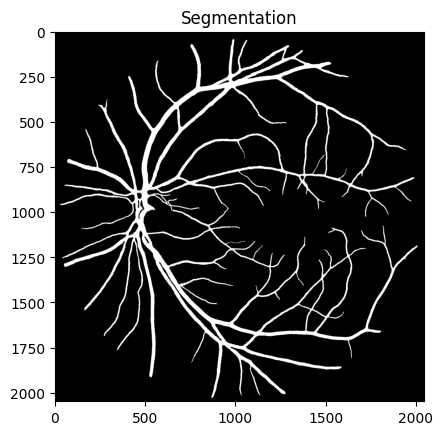

In [165]:
plt.imshow(segmentation,cmap = "gray") #Display the segmentation
plt.title("Segmentation")
plt.show()

In [207]:
# Depending on the quality of the segmentation, you would need to regularize (smooth) it more or less
#before computing the skeleton for instance by uncomment the following command
#segmentation = segmentation.filter(ImageFilter.ModeFilter(size=3))

segmentation = segmentation.convert('L')
segmentation_array = np.array(segmentation)/255 #Convert the segmentation to a numpy array with value 0 and 1
skeleton = skeletonize(segmentation_array) # Compute the skeleton of the segmentation

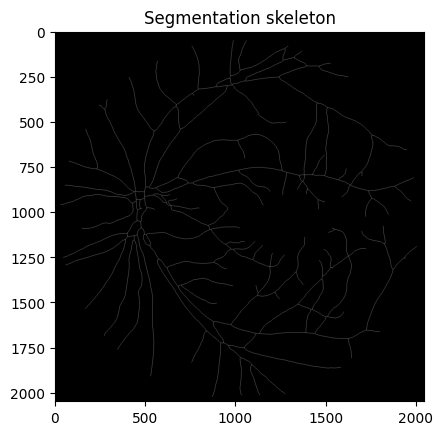

In [208]:
plt.imshow(skeleton,cmap = 'gray')
plt.title("Segmentation skeleton")
plt.show()

In [210]:
#AREA
from PVBM.GeometricalAnalysis import GeometricalVBMs #Import the geometrical analysis module
geometricalVBMs = GeometricalVBMs() #Instanciate a geometrical VBM object
a = geometricalVBMs.area(segmentation_array)
print("The area is {}".format(a))

The area is 384779.0


In [209]:
print(segmentation_array.shape)



(2048, 2048)


In [204]:
#n_end,n_inter,end,inter = geometricalVBMs.compute_particular_points(skeleton)

In [213]:
#Perimeter
p,border_matrix = geometricalVBMs.compute_perimeter(segmentation_array)
print("The perimeter is {}".format(p))


The perimeter is 61502.048301696115


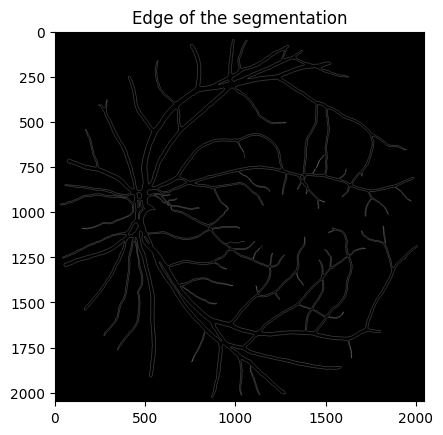

In [214]:
plt.imshow(border_matrix,cmap = "gray")
plt.title("Edge of the segmentation")
plt.show()

In [215]:
#Fractal
from PVBM.FractalAnalysis import MultifractalVBMs
fractalVBMs = MultifractalVBMs(n_rotations = 25,optimize = True, min_proba = 0.0001, maxproba = 0.9999)
D0,D1,D2,SL = fractalVBMs.compute_multifractals(segmentation_array)
print("The fractal biomarkers are D0: {}, D1: {}, D2: {}, SL: {}".format(D0,D1,D2,SL))

The fractal biomarkers are D0: 1.5156224588087743, D1: 1.5051637567224894, D2: 1.489785248228887, SL: 0.8061296918444485
